
Import the data and show the first five rows.


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
vdf = sns.load_dataset("titanic")
print(vdf.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  



The number of the rows and the columns in the data. I try three ways for doing that.


In [8]:
rows, columns = vdf.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 891
Number of columns: 15


In [29]:
rows, columns = vdf.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 891, Columns: 15


In [30]:
rows, columns = vdf.shape
print(f"Rows: {vdf.shape[0]}, Columns: {vdf.shape[1]}")

Rows: 891, Columns: 15



Type of the data. I try three approaches there.


In [12]:
describe = vdf.dtypes
print(describe)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [11]:
print(vdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [13]:
print(vdf.dtypes.value_counts())

object      5
int64       4
float64     2
bool        2
category    1
category    1
Name: count, dtype: int64



Calculate the missing values from the columns. The first code was not sufficient, so I try one better with the sum.


In [14]:
print(vdf.isnull())

     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False      

In [22]:
print(vdf.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64



The number of passangers that survived. First I try to calculate the number of people that embarked in the cruise minus the survivals, but it didn`t work because of the data available in the `Embarked` column.
So I look to data values, and the column `Survived` returns the values 0 = no and 1 = yes, so I will use that information.


In [32]:
total = vdf['survived'].sum() - vdf['embarked'].sum()

print("Total:", total)

TypeError: can only concatenate str (not "int") to str

In [33]:
print(vdf['survived'].value_counts())

survived
0    549
1    342
Name: count, dtype: int64


O e 1 with the correspondent names

In [39]:
survival_counts = vdf['survived'].value_counts()

print(f"Did not survive: {survival_counts[0]}")
print(f"Survive: {survival_counts[1]}")

Did not survive: 549
Survive: 342


In [41]:
print(vdf.groupby('sex')['survived'].value_counts())

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64



The average age of the passangers. The first one I made wrong, and correct in the second.


In [42]:
print(vdf.mean('age'))

ValueError: No axis named age for object type DataFrame

In [43]:
print(vdf['age'].mean())

29.69911764705882


A simple plot

Text(0, 0.5, 'Numbers of passengers')

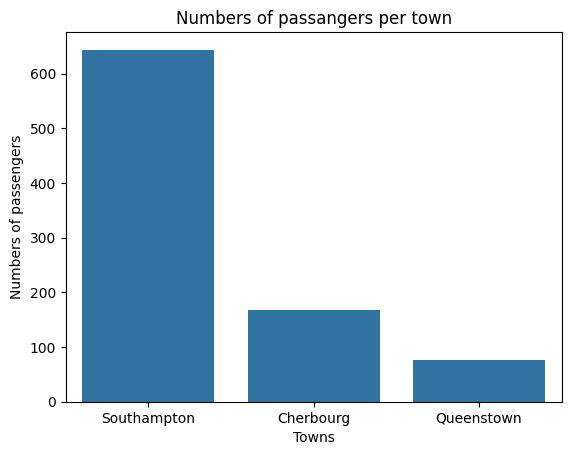

In [57]:
sns.countplot(data=vdf, x='embark_town')

plt.title("Numbers of passangers per town")
plt.xlabel("Towns")
plt.ylabel("Numbers of passengers")

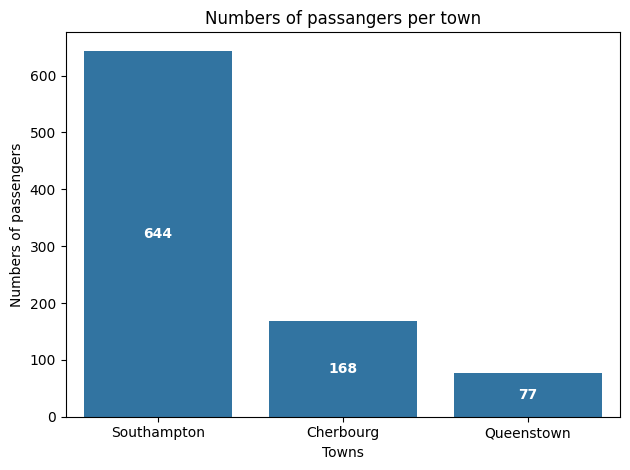

In [58]:
ax = sns.countplot(data=vdf, x='embark_town')

for bar in ax.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height() / 2
    ax.annotate(
        f'{count}',
        xy=(x, y),
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )
    
plt.title("Numbers of passangers per town")
plt.xlabel("Towns")
plt.ylabel("Numbers of passengers")
plt.tight_layout()
plt.show()